## Data Summary

### Personal View

Social media has become such a large influence in the modern business world. Companies/businesses need to stay up to date with customers perception of their services, the majority of which can be captured from social media. Twitter is a major social media platform. Customers are continuously providing postive and negative feedback of the services provided by companies via Twitter. Airlines are no exception to this.

The problem at hand is a form of sentiment analysis. The categories of feedback are negative, neutral and postive feeback, along with reasoning for any negtive types of feedback. We will apply Natural Learning Processes in order to provide useful insight for Airlines. We will look to clean the data, fit and tune a model which can then be used on additional data sets to provide further insight to the Airlines. 

The text variable within the data is key, as it consists of the description of the specific tweet. Being able to determine key metrics and recurring areas with negative feedback, will allow the specific Airline to determine where they can improve their service. 

### Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') #ignore the warnings

In [2]:
# install and import necessary libraries.

#!pip install contractions


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import re, string, unicodedata                          # Import Regex, string and unicodedata.
# import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt        

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Import & Load Dataset

In [50]:
data = pd.read_csv('Tweets.csv') #import the tweets csv file
data.head() # a look at the first 5 rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Print the Shape of the Data

In [4]:
print("The Shape of the Data is: ")
data.shape # look at the number of rows and columns

The Shape of the Data is: 


(14640, 15)

### Data Description

In [5]:
data.info() # a visual of the column names and the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
data.describe().T #  a look at the data descriptions

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


### Insight & Overview

• The majority of columns we are working with are of 'object' data type. 

• There are 2 float data types and 2 integers.

• There are a total of 14,640 rows in the data set.

• There is little that can be interpreted from the description summary of the dataset, given there are only 4 numerical data types. Also, there are a large numnber of NaN values in the dataset which effects the statistical summary significantly (resulting in very low values).  

## Exploratory Data Analysis (EDA)

• We will use EDA to help provide of the variables within the dataset. Given that we are looking at various categorical variables we will look at the distribution of these variables using bar plots. 

In [7]:
# Function to create barplots that indicate percentage for each category.
# This will help provide observations of some of the categorical data types. 

def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

### Observation of the Tweets per Airline

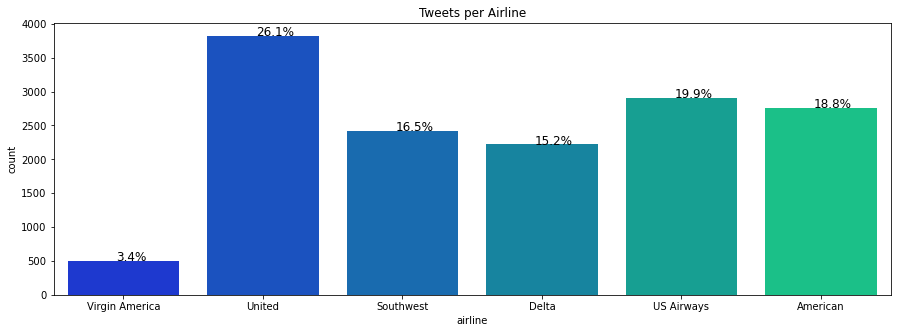

In [8]:
plt.figure(figsize=(15,5))
plt.title("Tweets per Airline")
ax = sns.countplot(data["airline"],palette='winter')
perc_on_bar(ax,data["airline"])

### Insights

• United Airlines has the highest amount of tweets with just over 26%.

• Virgin America has the least amount of tweets, accounting for just 3.4% of the total airline tweets.

• There is little variance between the remaining 4 airlines.

### Observation of Sentiment for each Tweet

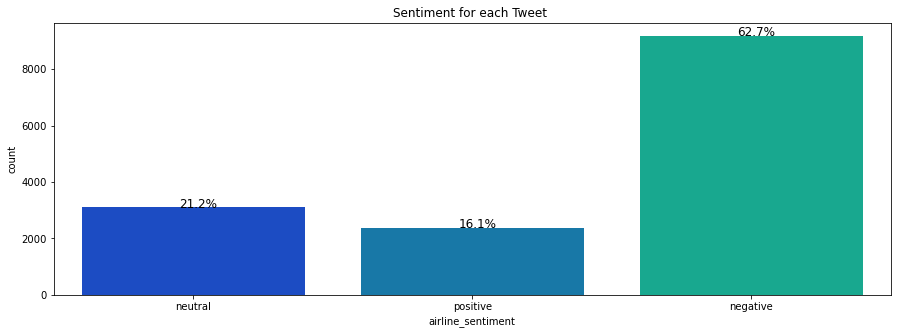

In [9]:
plt.figure(figsize=(15,5))
plt.title("Sentiment for each Tweet ")
ax = sns.countplot(data["airline_sentiment"],palette='winter')
perc_on_bar(ax,data["airline_sentiment"])

### Insights

• Negative feedback accounts for the highst number of tweets at 62.7% of the total tweet count, followed by neutral feedback (21.2%). Positive feedback accounts for the least amount of tweets at 16.1%.

• This gives insight that customers are more inclined to give negative feedback when they experience it.  

### Observation of Sentiment for each airline

In [10]:
## Function to plot stacked bar chart. Stacked bar plots are useful when comparing 2 variables. 
## in this case we will be looking at the sentiment broken out for each airline. 
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    print("-" * 120)
    tab = pd.crosstab(x, data["airline_sentiment"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=2)
    plt.show()

------------------------------------------------------------------------------------------------------------------------


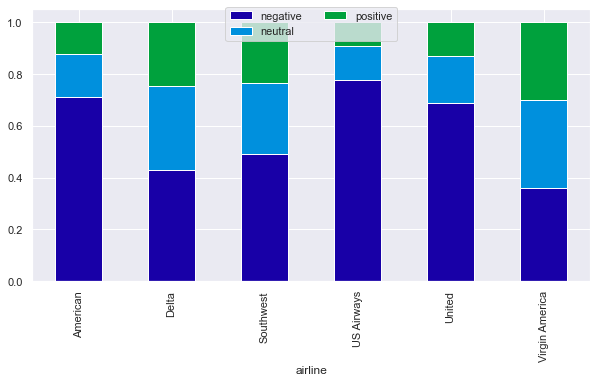

In [11]:
stacked_plot(data["airline"])

### Insights

• The negative feeback for US Airways, American and United Airlines significantly outweighs the other 2 categories of feedback for those airlines. 

• Delta & Virgin America have the most even distribution of the 3 categories of feeback. Customers are therefore more satisfied with their service. 

### Negative Reasons

We will now look at the distribution of the negative reasons. Given that negative feedback is the primary class of feedback, taking a look at the speciofic reason may provide good insight for airlines.   

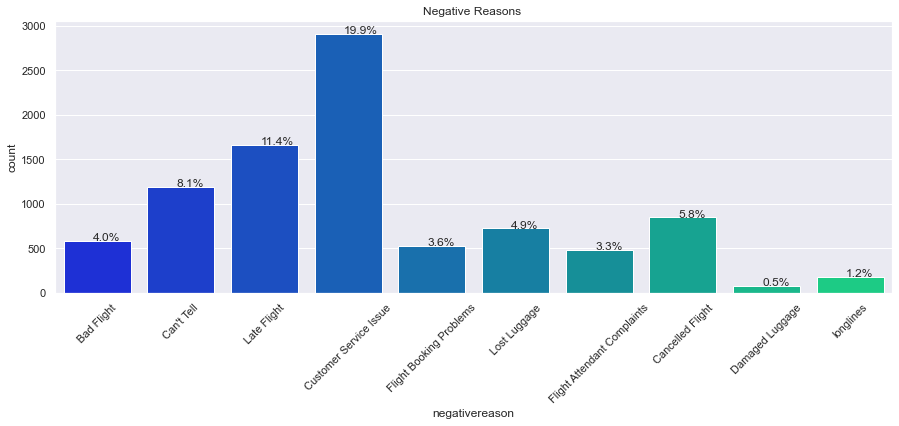

In [12]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
plt.title("Negative Reasons ")
ax = sns.countplot(data["negativereason"],palette='winter')
perc_on_bar(ax,data["negativereason"])

### Insights

• Customer Service issues account for the highest percentage of the negative feeback. This should be the primary focus of improvement for Airlines. Customer service in general will improve customer satisfcation. This will therefore improve the likelhood of customers returning for further service in the future.  

• Late flights also account for a relatively high portion of the negative feedback at 11.4%. 

• Negtive feeback categorized as 'Cant Tell' accounts for the 3rd highest amount of negative feedback at 8.1%. However, this does not provide much insight for Airlines, as there is no specific reason given.  

### Word Cloud Graph

In [51]:
data_copy = data # create a copy of the origional dataframe

In [48]:
data_copy['text']= data_copy.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data_copy, title):
    text = ' '.join(data_copy['text'].astype(str).tolist())                 # Converting text into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

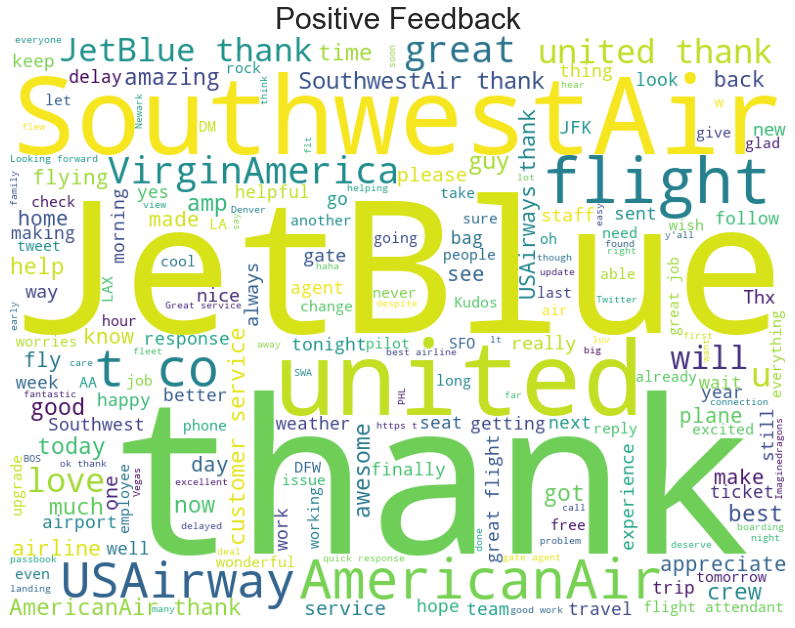

In [56]:
show_wordcloud(data_copy[data_copy.airline_sentiment == 'positive'], title = "Positive Feedback")

### Insights

• Looking at the positive feedback, some postive words provided by customers include best, excited, thank, great, glad and amazing. Overall these words would imply that theese customers are satisfied with the airline service. 

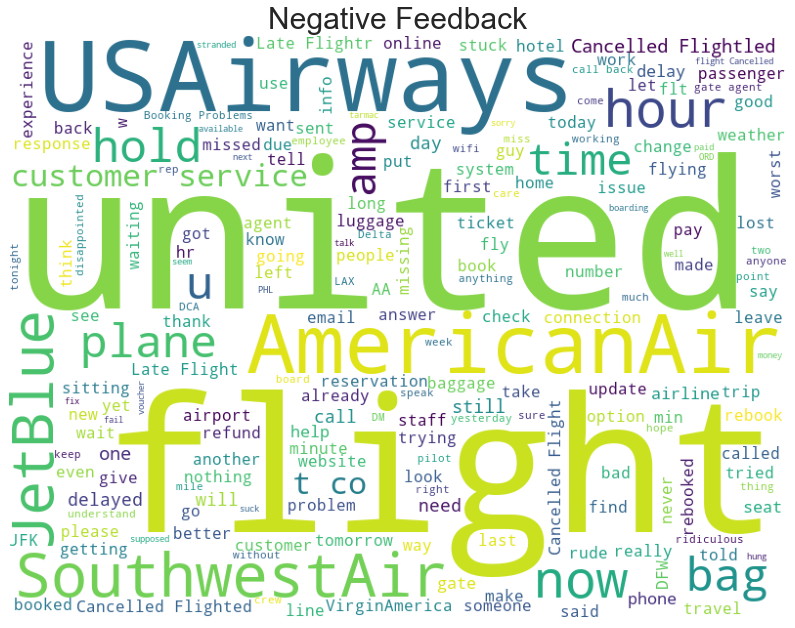

In [57]:
show_wordcloud(data_copy[data_copy.airline_sentiment == 'negative'], title = "Negative Feedback")

### Insights

• Looking at the negative feedback, customers use words such as cancelled, delay, late flight, missed. These words correlate to the negative reasons graph, in which some of the primary classes of complaints were late flights and cancelled flights.  

## Understanding of Data Columns

### Drop Unnecessasry Columns

In [14]:
data.drop(data.columns.difference(['text','airline_sentiment']), 1, inplace=True) # remove columns other than text & sentiment
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Check the Shape of the Data

In [15]:
print("The Shape of the Data is:") #check the shape of the data.
data.shape

The Shape of the Data is:


(14640, 2)

### Print the first 5 rows

In [16]:
print("The First 5 Rows are:") # print the first 5 rows
data.head()

The First 5 Rows are:


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## Text pre-processing: Data preparation

### HTML Tag Removal

In [17]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")  #using beutiful soup to remove HTML tags            
    return soup.get_text() 

data['text'] = data['text'].apply(lambda x: strip_html(x)) # referring back to the html user defined function
data.head() # look at the firtst 5 rows

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Tokenization

In [19]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

### Remove the Numbers

In [18]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', str(text)) # used to remove nunbers from the data
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x)) # referring back to the user defined function to remove numbers
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Stopwords

In [20]:
stopwords = stopwords.words('english') # downloading the englighs stop words

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [21]:
lemmatizer = WordNetLemmatizer()

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# we will use lemmitizer instead of stemming. It is more accurate that stemming, but it is computationally more time consuming. 
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica nt today must mean need take ano...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


## Vectorization

### Count Vectorization

In [22]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()                #define an empty countvectorizer variable.
data_features = vectorizer.fit_transform(data['text']) # fit and transfor the text within the data

data_features = data_features.toarray()  # convert to an array

In [25]:
print(data_features.shape) # a look at the shape of the count vectorizer data. 

(14640, 12049)


### Use TfidfVectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorizer_IDF = TfidfVectorizer() #define an empty TfidfVectorizer variable
data_features_IDF = vectorizer_IDF.fit_transform(data['text']) # fit and transform the text variable in the data set

In [28]:
print(vectorizer_IDF.vocabulary)
print(data_features_IDF.toarray())
print(data_features_IDF.shape)

None
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(14640, 12049)


### Modelling , Tuning and Evaluation

We will need to first split the model into training & test data. We are going to apply a random forest model on the newly transformed dataset, which is ready for modelling. We will evaluate the performace of the model for both the countvectorizer and the TfidfVectorizer. We will then look to tune the model to improve the accuracy of the model 

In [29]:
labels = data['airline_sentiment']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [31]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print('The accuracy returned is:')
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))


RandomForestClassifier(n_estimators=10, n_jobs=4)
The accuracy returned is:
0.7239071038251367


In [32]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [33]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

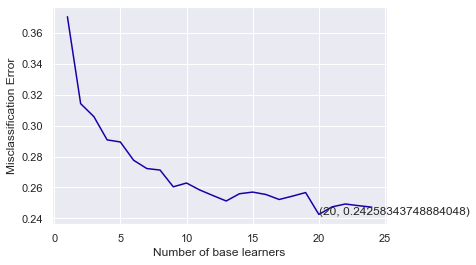

In [34]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [35]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7691256830601093

• The accuracy for the countvectorizer of the model has improved after appying k-folds cross validation

In [36]:
result =  clf.predict(X_test)

[[2591  154   69]
 [ 401  400   83]
 [ 210   97  387]]
0.7691256830601093


<AxesSubplot:>

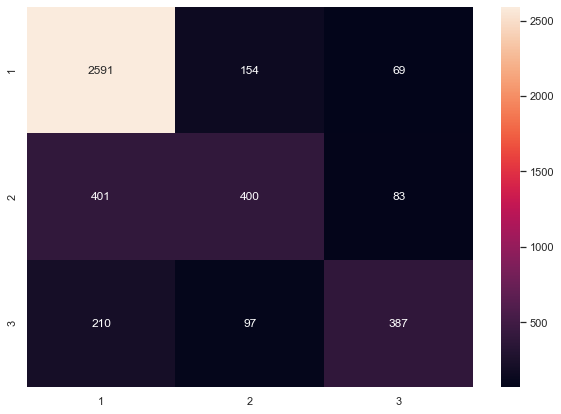

In [37]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

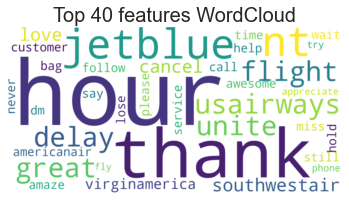

In [38]:
all_features = vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### Term Frequency(TF) Evaluation

In [39]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [40]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features_IDF, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7023907103825137


In [41]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

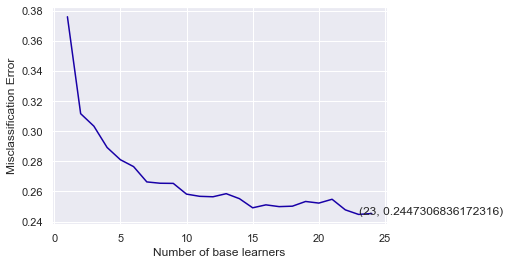

In [42]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [43]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7709471766848816

• The accuracy after applying k-folds cross validation on the TF Evaluation has increased

In [44]:
result = clf.predict(X_test)

[[2569  175   70]
 [ 393  414   77]
 [ 190  101  403]]
0.7709471766848816


<AxesSubplot:>

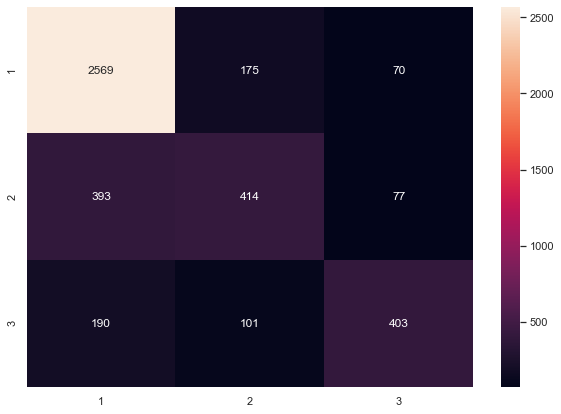

In [46]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

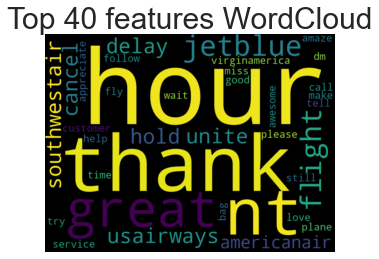

In [47]:
all_features = vectorizer_IDF.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### Conclusion

Summary:
We used a dataset which has tweet reviews in text format and their sentiment (either positive, negative or neutral).
The goal was to build a model for text-classification. We pre-processed the data using various techniques and libraries. The text varibale within the data was unstructured. Therefore we needed to clean the data and transform it to a structured dataset, so that it will be fit for a machine learning model. Some of the data pre-processing techniques included; HTML tag removal, tokenization (seperating by words), removal of numnbers, lemmatization (grouping or words with similar spellings i.e. resolve them to their dictionary form), punctuation removal etc.. We created a Word Cloud plot based on the text of the tweet reponse and the sentiment class.

Once the data pre-processing techniuqes had been applied, we then need to convert the text variable to numbers, so that it could actually be fed to a model. The methoods used to do this were, CountVectorizer and TfidfVectorizer. CountVectorizer is a count of the amoount of times a word occurs in a document, for each document. TfidfVectorizer differs, as it is a scheme to weight individual tokens. One of the main benfits is that it reduces the importance of words that occur regularly. 

Once we applied these concepts, we were ready to train the model. We then optimized the parameter, which led to an increase the overall accuracy.

After building the classification model, we predicted the results for the test data.
We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
However, in order to further improve the accuracy of the model, we could look at other hyperparamter tuning techniques, increase the size of the dataset or even implement the max_feature parameter in the vectorizer. In additiona, we could at other pre-processing techniques to increase the overall accuracy even further. For the purpose of this assignment we will not take any of these actions, but they would be areas to place focus on if we were looking to futher improve the model. 